In [26]:
import math
import pickle
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from UDFManager import *
from pyudf.rotation import Quaternion

plt.style.use('presentation')

In [27]:
RHO = 1.0
MU  = 1.0
a   = 5.0
h   = a / 2.0
gra = 0.06
PHI = 0.000998685

gravity = np.array([0.0, 1.0, 0.0]) * (gra * RHO * 4 / 3 * np.pi * (a**3))
gammadot = np.array([round(i * 0.001, 3) for i in range(0, 62, 2)])

In [28]:
viscosity_map = {}

In [31]:
for j in range(3):
    viscosities = np.array([pd.read_csv(f'{j:0=2}/udf/{i:0=3}/output.txt', header=None, names=['time', 'shear_rate', 'shear_strain', 'shear_stress', 'viscosity'], sep='\s+', comment="#")[10:]['viscosity'].values[-1] for i in tqdm(range(0, 62, 2))])
    viscosity_map[f'{j:0=2}'] = viscosities
with open('viscosity_map.pickle', 'wb') as f:
    pickle.dump(viscosity_map, f)

In [32]:
with open('viscosity_map.pickle', 'rb') as f:
    viscosity_map = pickle.load(f)

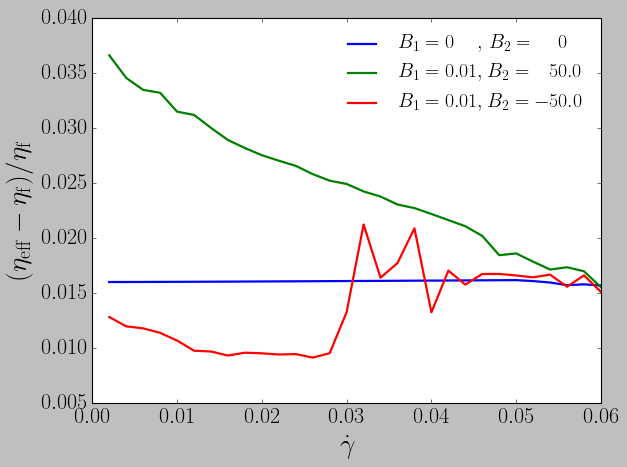

In [39]:
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(0, 0.06)

plt.xlabel('$\dot{\gamma}$', fontsize=25)
plt.ylabel('$(\eta_\mathrm{eff} - \eta_\mathrm{f}) / \eta_\mathrm{f}$', fontsize=25)

plt.plot(gammadot[1:], (viscosity_map['00'][1:] - MU) / MU, label='$B_1=0  \ \ \ \ , \, B_2=\ \ \ \ 0$')
plt.plot(gammadot[1:], (viscosity_map['01'][1:] - MU) / MU, label='$B_1=0.01, B_2=\ \ \,50.0$')
plt.plot(gammadot[1:], (viscosity_map['02'][1:] - MU) / MU, label='$B_1=0.01, B_2=     -50.0$')
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("../figs/sim04/effective_viscosity.png")